In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

""" 
DSC672
Team: John Matune, Mike Yacobucci, Steve Rummel
Project: Energy Consumption and Renewable Energy

Purpose: 
    Preprocess the Car Charging data set. Complete minor analysis.

Findings:
    The Car Charging dataset consists of a simple pattern containing 
    only two values for Electricity_KW_SQFT, either 22597 or 0.
    The data 8760 records, one record for each hour of a 365 day year.
    At first glance the value of KW_SQFT seems to depend solely on the time of day. 
    A more thorough analysis (via grouping) will be completed to confirm this.

"""

#read data
car_charg = pd.read_csv('./raw/car_charging.csv')
#rename kw
car_charg.rename(index=str, columns={"Electricity_KW_SQFT": "KW_SQFT"}, inplace=True)

#replace year var with some dummy year
car_charg.Year = 2099

car_charg.head()

,Year,Month,Day,Hour,Consumption_type,KW_SQFT
0,2099,1,1,1,ELECTRIC_CAR,22597.669011
1,2099,1,1,2,ELECTRIC_CAR,22597.669011
2,2099,1,1,3,ELECTRIC_CAR,22597.669011
3,2099,1,1,4,ELECTRIC_CAR,22597.669011
4,2099,1,1,5,ELECTRIC_CAR,22597.669011


In [2]:
#Convert hour to minutes
car_charg['Minute'] = (car_charg.Hour-1)*60

#convert Year Month Day and Minute into a timestamp
car_charg['DateTime'] = pd.to_datetime(car_charg[['Year','Month','Day','Minute']])
car_charg.head(25)

,Year,Month,Day,Hour,Consumption_type,KW_SQFT,Minute,DateTime
0,2099,1,1,1,ELECTRIC_CAR,22597.669011,0,2099-01-01 00:00:00
1,2099,1,1,2,ELECTRIC_CAR,22597.669011,60,2099-01-01 01:00:00
2,2099,1,1,3,ELECTRIC_CAR,22597.669011,120,2099-01-01 02:00:00
3,2099,1,1,4,ELECTRIC_CAR,22597.669011,180,2099-01-01 03:00:00
4,2099,1,1,5,ELECTRIC_CAR,22597.669011,240,2099-01-01 04:00:00
5,2099,1,1,6,ELECTRIC_CAR,0.000000,300,2099-01-01 05:00:00
6,2099,1,1,7,ELECTRIC_CAR,0.000000,360,2099-01-01 06:00:00
7,2099,1,1,8,ELECTRIC_CAR,0.000000,420,2099-01-01 07:00:00
8,2099,1,1,9,ELECTRIC_CAR,0.000000,480,2099-01-01 08:00:00
9,2099,1,1,10,ELECTRIC_CAR,0.000000,540,2099-01-01 09:00:00


In [3]:
#set the dateTime to be index
car_charg.set_index('DateTime', inplace=True)
car_charg.head()

,Year,Month,Day,Hour,Consumption_type,KW_SQFT,Minute
DateTime,,,,,,,
2099-01-01 00:00:00,2099,1,1,1,ELECTRIC_CAR,22597.669011,0
2099-01-01 01:00:00,2099,1,1,2,ELECTRIC_CAR,22597.669011,60
2099-01-01 02:00:00,2099,1,1,3,ELECTRIC_CAR,22597.669011,120
2099-01-01 03:00:00,2099,1,1,4,ELECTRIC_CAR,22597.669011,180
2099-01-01 04:00:00,2099,1,1,5,ELECTRIC_CAR,22597.669011,240


In [4]:
#remote now redundant variables
car_charg = car_charg[['Consumption_type', 'KW_SQFT']]
car_charg.head()

,Consumption_type,KW_SQFT
DateTime,,
2099-01-01 00:00:00,ELECTRIC_CAR,22597.669011
2099-01-01 01:00:00,ELECTRIC_CAR,22597.669011
2099-01-01 02:00:00,ELECTRIC_CAR,22597.669011
2099-01-01 03:00:00,ELECTRIC_CAR,22597.669011
2099-01-01 04:00:00,ELECTRIC_CAR,22597.669011


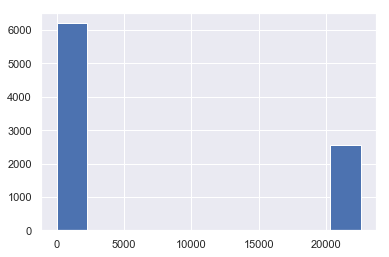

In [5]:
#distribution of KW_hour
car_charg.KW_SQFT.hist();

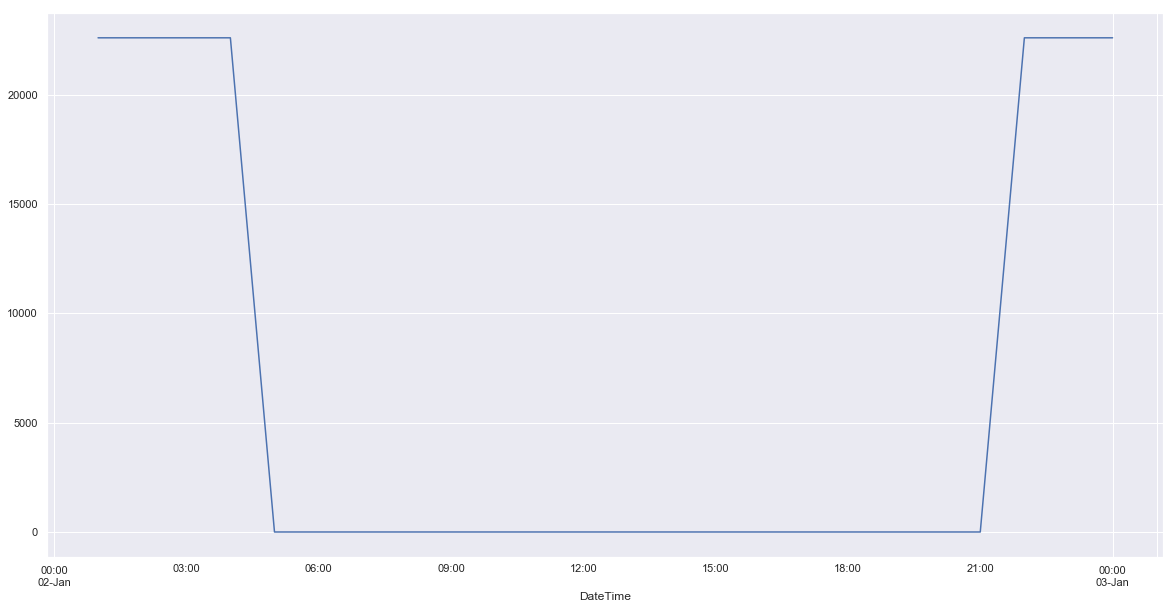

In [6]:
# A 24 hour period.
car_charg.KW_SQFT[25:49].plot(figsize=(20,10));

In [7]:
#TODO make sure the KW_SQFT is the same for each hour
car_charg.groubby

AttributeError: 'DataFrame' object has no attribute 'groubby'